# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# Lists
city_name = []
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []

In [7]:
# Loop through the list of cities

print("Beginning Data Retrieval")
print("-------------------------------")

for city in cities:
    response = requests.get(query_url + city).json()

    #try to pull data for each and print processing prompt
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_name.append(city)
        print(f"Processing Record for {city}")
        
    #handle cities not found
    except:
        print("City Not Found. Skipping...")

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")     

Beginning Data Retrieval
-------------------------------
Processing Record for jamestown
Processing Record for knysna
Processing Record for meulaboh
Processing Record for jingdezhen
Processing Record for sioux lookout
Processing Record for atar
Processing Record for kagadi
Processing Record for ushuaia
Processing Record for cape town
Processing Record for busselton
Processing Record for bredasdorp
City Not Found. Skipping...
Processing Record for mahebourg
Processing Record for albany
Processing Record for morondava
Processing Record for imperia
Processing Record for bluff
City Not Found. Skipping...
Processing Record for atuona
Processing Record for nishihara
Processing Record for saskylakh
Processing Record for buala
Processing Record for avarua
Processing Record for arraial do cabo
Processing Record for rio cuarto
Processing Record for port moresby
Processing Record for bodden town
Processing Record for sisimiut
City Not Found. Skipping...
Processing Record for seoul
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#create Dataframe
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
0,jamestown,-33.21,138.60,13.47,87,89,2.65
1,knysna,-34.04,23.05,19.00,93,100,1.00
2,meulaboh,4.14,96.13,26.89,81,0,3.03
3,jingdezhen,29.29,117.20,12.33,93,77,1.13
4,sioux lookout,50.10,-91.92,-5.00,92,90,6.20
...,...,...,...,...,...,...,...
558,dulce nombre de culmi,15.08,-85.56,27.77,51,7,2.98
559,necochea,-38.55,-58.74,19.44,87,92,3.13
560,lazaro cardenas,28.39,-105.62,21.11,23,5,2.60
561,omboue,-1.57,9.26,25.29,87,100,0.91


In [9]:
#export into CSV

weather_data.to_csv(r'../my_output_data/cities.csv', index = None)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

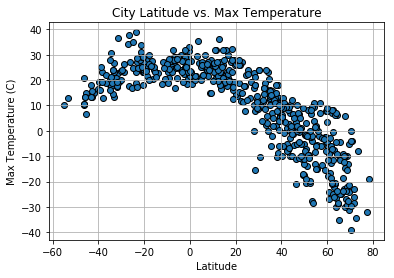

In [15]:
# Create a Scatter Plot for latitude vs. temperature
plt.scatter(weather_data["Lat"], weather_data["Temp"], marker="o", edgecolors="black")

# Graph Properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("../my_output_data/lat_vs_temp.png")

# Show Plot
plt.show()

In [ ]:
# This code is analyzing and plotting max temperature recorded at 631 cities at various latitude around the globe.
# This is what we would expect, as temperatures are higher nearer the equator.
# The fact that the "arch" extends much farther into northern latitudes than southern latitudes may be affected by the shape of the continents
# and broader trends in human history - python may not be the correct tool for that analysis!

#### Latitude vs. Humidity Plot

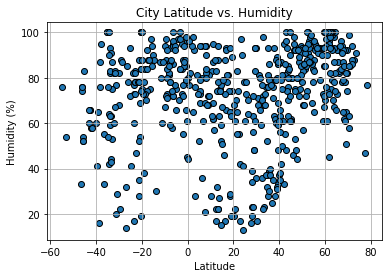

In [11]:
# Create a Scatter Plot for latitude vs. humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black")

# Graph Properties
plt.title("City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../my_output_data/lat_vs_hum.png")

# Show Plot
plt.show()

In [ ]:
# This code analyzes and plots the humidity % compared with latitude. There are no obvious trends here, as we find examples of high and low
# humidity cities at nearly all recorded latitudes. This phenomenon is likely influenced by a city's proximity to sources of water.

#### Latitude vs. Cloudiness Plot

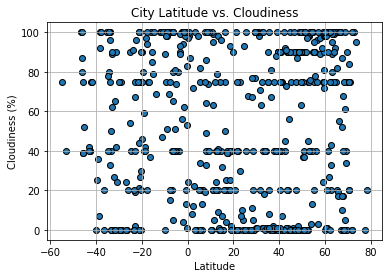

In [12]:
# Create a Scatter Plot for latitude vs. cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black")

# Graph Properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../my_output_data/lat_vs_cloud.png")

# Show Plot
plt.show()

In [ ]:
# This code analyzes and plots the percent of cloudy days in a year, against the latitude of the respective city. As we can see, there is 
# great variation in cloudiness at all latitudes. 

#### Latitude vs. Wind Speed Plot

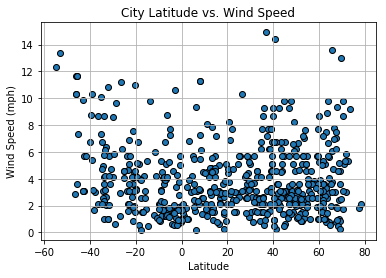

In [13]:
# Create a Scatter Plot for latitude vs. wind speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black")

# Graph Properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("../my_output_data/lat_vs_wind.png")

# Show Plot
plt.show()

In [ ]:
# This code analyzes and plots average wind speed recorded in cities at various latitudes. As we see, few cities have average wind speeds
# above 8 mph, and those that do can be found at all latitudes. Elevation, geography, and topography likely have a stronger effect than 
# latitude on this metric.

## Linear Regression

In [117]:
# Create Northern and Southern Hemisphere DataFrames

northern_weather_data = weather_data[weather_data['Lat'] >= 0]

southern_weather_data = weather_data[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [80]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_weather_data["Lat"], northern_weather_data["Temp"])

# Get regression values
regress_values = northern_weather_data["Lat"] * slope + intercept
print(regress_values)

0      -14.490687
2       10.333333
3      -13.346188
4      -14.273377
5       17.432119
          ...    
1059    -0.387282
1060    -0.198947
1061   -16.772439
1063    29.840508
1064    -4.581361
Name: Lat, Length: 728, dtype: float64


In [81]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.72x +33.43


The r-squared is: -0.8615886961799204


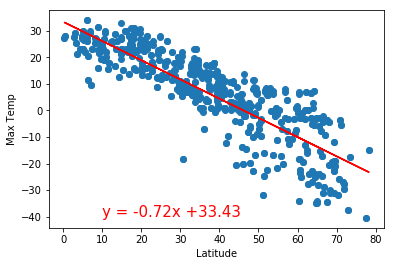

In [83]:
# Create Plot
plt.scatter(northern_weather_data["Lat"], northern_weather_data["Temp"])
plt.plot(northern_weather_data["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,-40),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [86]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_weather_data["Lat"], southern_weather_data["Temp"])

# Get regression values
regress_values = southern_weather_data["Lat"] * slope + intercept
print(regress_values)

1       14.993861
7       27.380444
10      22.018378
11      20.121072
12      20.234541
          ...    
1046    22.780995
1050    16.917555
1051    23.638609
1062    28.230142
1065    22.361424
Name: Lat, Length: 338, dtype: float64


In [87]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.26x +29.02


The r-squared is: 0.6196166134187556


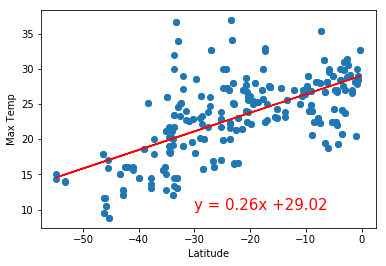

In [89]:
# Create Plot
plt.scatter(southern_weather_data["Lat"], southern_weather_data["Temp"])
plt.plot(southern_weather_data["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [90]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_weather_data["Lat"], northern_weather_data["Humidity"])

# Get regression values
regress_values = northern_weather_data["Lat"] * slope + intercept
print(regress_values)

0       83.395537
2       70.414660
3       82.797060
4       83.281902
5       66.702591
          ...    
1059    76.020641
1060    75.922158
1061    84.588702
1063    60.214046
1064    78.213792
Name: Lat, Length: 728, dtype: float64


In [91]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.38x +58.34


The r-squared is: 0.3742339003012909


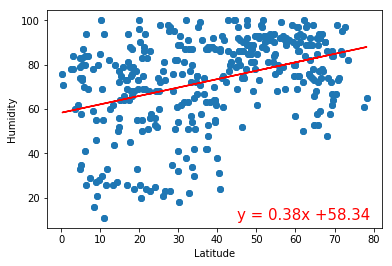

In [93]:
# Create Plot
plt.scatter(northern_weather_data["Lat"], northern_weather_data["Humidity"])
plt.plot(northern_weather_data["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [94]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_weather_data["Lat"], southern_weather_data["Humidity"])

# Get regression values
regress_values = southern_weather_data["Lat"] * slope + intercept
print(regress_values)

1       60.766150
7       78.970789
10      71.090127
11      68.301645
12      68.468411
          ...    
1046    72.210950
1050    63.593415
1051    73.471390
1062    80.219595
1065    71.594303
Name: Lat, Length: 338, dtype: float64


In [95]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.39x +81.38


The r-squared is: 0.2703253399597768


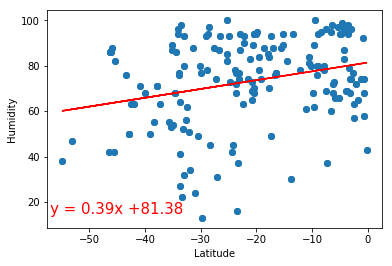

In [97]:
# Create Plot
plt.scatter(southern_weather_data["Lat"], southern_weather_data["Humidity"])
plt.plot(southern_weather_data["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-57,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [98]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_weather_data["Lat"], northern_weather_data["Cloudiness"])

# Get regression values
regress_values = northern_weather_data["Lat"] * slope + intercept
print(regress_values)

0       68.298568
2       47.933944
3       67.359668
4       68.120296
5       42.110387
          ...    
1059    56.728705
1060    56.574202
1061    70.170426
1063    31.931046
1064    60.169357
Name: Lat, Length: 728, dtype: float64


In [99]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.59x +28.99


The r-squared is: 0.3065123043090051


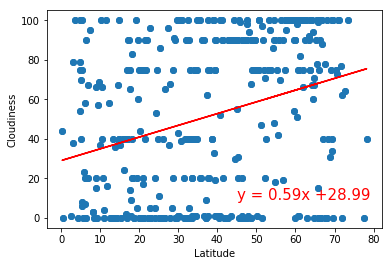

In [102]:
# Create Plot
plt.scatter(northern_weather_data["Lat"], northern_weather_data["Cloudiness"])
plt.plot(northern_weather_data["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,9),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [103]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_weather_data["Lat"], southern_weather_data["Cloudiness"])

# Get regression values
regress_values = southern_weather_data["Lat"] * slope + intercept
print(regress_values)

1       42.233259
7       67.184024
10      56.383011
11      52.561196
12      52.789761
          ...    
1046    57.919179
1050    46.108229
1051    59.646703
1062    68.895602
1065    57.074021
Name: Lat, Length: 338, dtype: float64


In [104]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.53x +70.49


The r-squared is: 0.19008787413114897


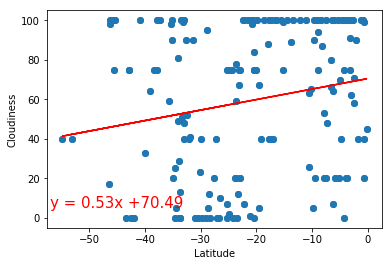

In [106]:
# Create Plot
plt.scatter(southern_weather_data["Lat"], southern_weather_data["Cloudiness"])
plt.plot(southern_weather_data["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-57,5),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [107]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_weather_data["Lat"], northern_weather_data["Wind Speed"])

# Get regression values
regress_values = northern_weather_data["Lat"] * slope + intercept
print(regress_values)

0       4.426555
2       3.942833
3       4.404253
4       4.422320
5       3.804506
          ...   
1059    4.151735
1060    4.148065
1061    4.471017
1063    3.562715
1064    4.233461
Name: Lat, Length: 728, dtype: float64


In [108]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.01x +3.49


The r-squared is: 0.10516901496385218


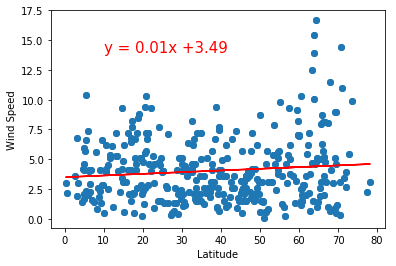

In [110]:
# Create Plot
plt.scatter(northern_weather_data["Lat"], northern_weather_data["Wind Speed"])
plt.plot(northern_weather_data["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,14),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [113]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_weather_data["Lat"], southern_weather_data["Wind Speed"])

# Get regression values
regress_values = southern_weather_data["Lat"] * slope + intercept
print(regress_values)

1       4.765790
7       3.387869
10      3.984362
11      4.195424
12      4.182801
          ...   
1046    3.899526
1050    4.551793
1051    3.804122
1062    3.293346
1065    3.946200
Name: Lat, Length: 338, dtype: float64


In [114]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.03x +3.21


The r-squared is: -0.1555321769857362


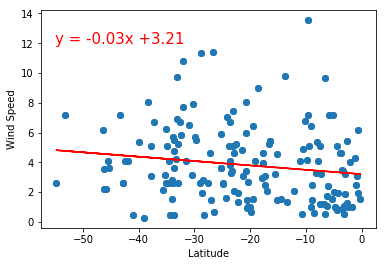

In [116]:
# Create Plot
plt.scatter(southern_weather_data["Lat"], southern_weather_data["Wind Speed"])
plt.plot(southern_weather_data["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()